## loading in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from traxio import readtrax
from copy import deepcopy
import scipy.signal as signal
import scipy.stats as stats
import mozmagno as magno
import circular
from importlib import reload
%matplotlib inline

#path = '/Users/vosshalllab/Dropbox/labwork/behavior/magno-data/' # mac
#path = '/home/molly/Dropbox/labwork/behavior/magno-data/' # magno
#path = '/home/mliu/Dropbox/labwork/behavior/magno-data/' # laptop
path = r'D:\Dropbox\labwork\behavior\magno-data\\'

names = ['m23-0413-orldarkbgair',
        'm24-0413-orldarkbgair',
        'm25-0413-orldarkbgair',
        'm26-0414-orldarkbgair',
        'm27-0414-orldarkbgair',
        'm28-0415-orldarkbgair',
        'm30-0415-orldarkbgair',
        'm31-0415-orldarkbgair',
        'm32-0419-orldarkbgair',
        'm33-0419-orldarkbgair',
        'm34-0419-orldarkbgair',
        'm35-0426-orldarkbgair',
        'm36-0426-orldarkbgair',
        'm37-0427-orldarkbgair',
        'm38-0428-orldarkbgair',
        'm39-0428-orldarkbgair',
        'm40-0428-orldarkbgair',
        'm41-0428-orldarkbgair',
        'm42-0429-orldarkbgair',
        'm43-0429-orldarkbgair',
        'm44-0429-orldarkbgair',
        'm45-0430-orllightbgair',
        'm46-0430-orllightbgair',
        'm47-0503-orllightbgair',
        'm48-0503-orllightbgair',
        'm49-0503-orllightbgair',
        'm50-0503-orllightbgair',
        'm51-0504-orllightbgairlc',
        'm52-0504-orllightbgairlc',
        'm53-0505-orllightbgairlc',
        'm54-0505-orllightbgairlc',
        'm55-0505-orllightbgairlc',
        'm57-0506-orllightbgairlc',
        'm58-0507-orllightbgair',
        'm59-0507-orllightbgair',
        'm60-0510-orllightbgair',
         'm61-0510-orllightbgair',
         'm62-0510-orllightbgair',
         'm64-0510-orllightbgair',
         'm65-0511-orldarkbgco2',
         'm66-0511-orldarkbgco2',
         'm67-0511-orldarkbgco2',
         'm68-0511-orldarkbgco2',
         'm69-0511-orldarkbgco2',
         'm70-0511-orldarkbgco2',
         'm75-0517-orldarkbgco2',
         'm76-0525-orldarkbgair',
         'm77-0525-orldarkbgair',
         'm78-0525-orldarkbgco2',
         'm79-0525-orldarkbgco2',
         'm80-0526-orldarkbgco2',
         'm81-0526-orldarkbgco2',
         'm82-0526-orldarkbgair',
         'm83-0526-orldarkbgco2',
         'm84-0526-orldarkbgco2',
         'm85-0526-orldarkbgco2',
         'm86-0527-orldarkbgco2',
         'm87-0527-orldarkbgco2',
         'm88-0528-orldarkbgco2',
         'm89-0528-orldarkbgco2',
         'm90-0529-orldarkbgco2',
         'm91-0530-orldarkbgco2',
         'm93-0530-orllightbgco2',
         'm94-0530-orllightbgair',
         'm95-0531-orllightbgco2',
         'm97-0531-orllightbgco2',
         'm98-0531-orllightbgco2',
         'm99-0531-orllightbgco2',
         'm100-0531-orllightbgco2',
         'm101-0531-orllightbgco2',
         'm102-0531-orllightbgco2',
         'm103-0601-orllightbgco2',
         'm104-0602-orllightbgco2',
         'm105-0603-orllightbgco2',
         'm106-0603-orllightbgco2',
         'm107-0608-orllightbgco2',
         'm108-0608-orllightbgco2',
         'm109-0608-orllightbgco2',
         'm110-0608-orllightbgco2',
         'm111-0614-orllightbgco2',
         'm112-0614-orllightbgco2',
         'm113-0614-orllightbgco2',
         'm114-0614-orllightbgco2',
         'm115-0614-orllightbgco2',
         'm116-0614-orllightbgair'
        ]

In [2]:
#reload(magno)
moz = np.array([ magno.load_trials(path,n) for n in names ])
dark = np.array([ 'dark' in n for n in names ])
light = np.array([ 'light' in n for n in names ])
co2 = np.array([ 'co2' in n for n in names ])
air = ~co2

d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.data['orientation'][data['orientation'] > 360] -= 360
d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.data['orientation'][data['orientation'] < 0] += 360


In [3]:
da = moz[dark & air]
dc = moz[dark & co2]
la = moz[light & air]
lc = moz[light & co2]

# manual freq corrections
da[1][1].freq = 1.0
da[1][3].freq = 0.5
da[2][1].freq = 1.0
da[2][13].freq = 0.5
da[2][37].freq = 1.0
da[2][47].freq = 0.5
da[2][50].freq = 1.0
da[2][56].freq = 0.5
da[2][61].freq = 0.5
da[3][15].freq = 0.5
da[4][9].freq = 1.0
da[4][29].freq = 0.5
da[4][46].freq = 0.5
da[4][59].freq = 0.5
da[4][62].freq = 0.5
da[4][65].freq = 1.0
da[4][68].freq = 1.0
da[4][79].freq = 1.0
da[4][86].freq = 1.0
da[5][14].freq = 0.5
da[6][7].freq = 1.0
da[6][31].freq = 1.0
da[6][43].freq = 1.0
da[6][53].freq = 0.5
da[6][66].freq = 0.0
da[6][69].freq = 1.0
da[6][86].freq = 0.5
da[6][95].freq = 0.5
da[7][2].freq = 0.5
da[7][3].freq = 1.0
da[7][4].freq = 0.5
da[7][8].freq = 1.0
da[8][11].freq = 0.0
da[9][-1].freq = 0.5
da[10][1].freq = 0.5
da[10][20].freq = 1.0
da[10][24].freq = 0.5
da[10][38].freq = 0.5
da[10][53].freq = 1.0
da[10][59].freq = 0.5
da[10][62].freq = 1.0
da[10][78].freq = 1.0
da[10][91].freq = 1.0
da[10][97].freq = 0.5
da[11][5].freq = 1.0
da[11][10].freq = 0.5
da[11][36].freq = 0.5
da[11][56].freq = 0.5
da[11][60].freq = 0.5
da[11][64].freq = 1.0
da[11][65].freq = 1.0
da[11][67].freq = 0.5
da[11][73].freq = 0.0
da[11][84].freq = 1.0
da[12][4].freq = 0.5
da[12][11].freq = 1.0
da[13][14].freq = 1.0
da[13][29].freq = 0.0
da[13][33].freq = 1.0
da[13][36].freq = 0.5
da[13][38].freq = 0.5
da[13][49].freq = 0.5
da[13][51].freq = 0.5
da[13][54].freq = 0.5
da[13][70].freq = 0.5
da[13][72].freq = 0.5
da[13][77].freq = 1.0
da[13][86].freq = 1.0
da[13][89].freq = 0.5
da[14][10].freq = 0.5
da[14][17].freq = 0.5
da[14][51].freq = 1.0
da[14][61].freq = 0.5
da[14][64].freq = 0.5
da[14][71].freq = 0.0
da[14][74].freq = 0.0
da[14][86].freq = 0.5
da[15][6].freq = 0.5
da[15][7].freq = 1.0
da[16][3].freq = 1.0
da[16][11].freq = 1.0
da[16][15].freq = 1.0
da[16][21].freq = 1.0
da[16][22].freq = 0.5
da[16][23].freq = 0.5
da[17][4].freq = 1.0
da[17][7].freq = 0.5
da[17][8].freq = 1.0
da[17][15].freq = 0.5
da[17][16].freq = 0.5
da[17][23].freq = 0.1
da[17][29].freq = 1.0
da[17][31].freq = 0.5
da[18][14].freq = 0.5
da[18][53].freq = 1.0
da[18][24].freq = 1.0
da[19][12].freq = 0.5
da[19][20].freq = 1.0
da[19][22].freq = 0.5
da[19][25].freq = 0.5
da[20][1].freq = 0.5
da[20][14].freq = 1.0
da[20][20].freq = 0.5
da[20][22].freq = 1.0
da[20][27].freq = 1.0
da[20][42].freq = 0.5
da[20][45].freq = 1.0
da[20][47].freq = 1.0
da[20][52].freq = 1.0
da[20][63].freq = 0.5
da[20][71].freq = 0.5
da[20][77].freq = 1.0
da[20][79].freq = 1.0
da[20][84].freq = 0.5
da[20][90].freq = 0.5
da[21][0].freq = 0.5
da[21][1].freq = 1.0
da[21][8].freq = 1.0
da[21][28].freq = 1.0
da[22][6].freq = 0.5
da[22][8].freq = 1.0
da[22][13].freq = 0.5
da[23][3].freq = 1.0
dc[0][14].freq = 1.0
dc[0][25].freq = 0.5
dc[0][38].freq = 0.0
dc[0][40].freq = 1.0
dc[1][0].freq = 1.0
dc[1][9].freq = 1.0
dc[1][12].freq = 0.5
dc[1][17].freq = 0.5
dc[1][27].freq = 0.5
dc[1][30].freq = 1.0
dc[1][32].freq = 0.0
dc[2][3].freq = 1.0
dc[2][27].freq = 0.5
dc[2][49].freq = 1.0
dc[2][56].freq = 1.0
dc[3][14].freq = 0.5
dc[4][1].freq = 1.0
dc[4][10].freq = 0.5
dc[4][11].freq = 0.5
dc[5][13].freq = 0.5
dc[5][56].freq = 1.0
dc[5][74].freq = 0.5
dc[6][16].freq = 0.5
dc[6][27].freq = 0.5
dc[9][6].freq = 0.0
dc[9][8].freq = 1.0
dc[9][41].freq = 1.0
dc[9][51].freq = 1.0
dc[9][86].freq = 1.0
dc[9][96].freq = 1.0
dc[10][4].freq = 1.0
dc[10][12].freq = 1.0
dc[10][21].freq = 1.0
dc[10][41].freq = 1.0
dc[11][43].freq = 1.0
dc[12][28].freq = 0.5
dc[12][64].freq = 1.0
dc[13][2].freq = 0.0
dc[14][6].freq = 1.0
dc[14][12].freq = 0.5
dc[14][25].freq = 0.5
dc[14][27].freq = 1.0
dc[14][39].freq = 1.0
dc[14][59].freq = 0.5
dc[14][73].freq = 1.0
dc[14][76].freq = 1.0
dc[15][4].freq = 1.0
dc[15][6].freq = 0.5
dc[16][9].freq = 0.5
dc[17][17].freq = 0.5
dc[17][27].freq = 0.5
dc[17][69].freq = 0.5
dc[18][9].freq = 1.0
dc[18][18].freq = 1.0
dc[18][63].freq = 1.0
dc[19][12].freq = 0.5
la[0][1].freq = 1.0
la[0][25].freq = 0.5
la[1][4].freq = 1.0
la[1][11].freq = 0
la[1][15].freq = 0.5
la[1][21].freq = 1.0
la[1][23].freq = 0.5
la[1][25].freq = 0.5
la[1][38].freq = 0.5
la[1][50].freq = 1.0
la[1][81].freq = 0.5
la[1][88].freq = 0.5
la[1][96].freq = 0.5
la[2][8].freq = 1.0
la[2][13].freq = 0.5
la[2][24].freq = 1.0
la[2][42].freq = 0.1
la[2][43].freq = 0.5
la[2][46].freq = 0.5
la[2][48].freq = 1.0
la[2][50].freq = 1.0
la[2][53].freq = 1.0
la[2][60].freq = 0.0
la[2][61].freq = 0.5
la[2][71].freq = 0.5
la[2][73].freq = 0.5
la[2][79].freq = 1.0
la[2][83].freq = 0.5
la[2][95].freq = 0.5
la[3][12].freq = 1.0
la[3][16].freq = 0.5
la[3][22].freq = 0.5
la[3][27].freq = 1.0
la[3][30].freq = 0.5
la[3][46].freq = 0.5
la[3][49].freq = 0.5
la[3][55].freq = 1.0
la[3][56].freq = 1.0
la[3][82].freq = 0.5
la[4][4].freq = 0.5
la[4][12].freq = 0.5
la[4][35].freq = 1.0
la[4][58].freq = 1.0
la[4][63].freq = 1.0
la[4][68].freq = 0.0
la[4][100].freq = 0.5
la[5][5].freq = 0.0
la[5][15].freq = 1.0
la[6][17].freq = 0.5
la[6][28].freq = 1.0
la[7][1].freq = 1.0
la[7][6].freq = 1.0
la[7][24].freq = 0.5
la[7][10].freq = 1.0
la[7][30].freq = 1.0
la[7][41].freq = 0.5
la[7][47].freq = 1.0
la[7][49].freq = 0.5
la[7][53].freq = 0.5
la[7][56].freq = 1.0
la[7][57].freq = 0.5
la[7][59].freq = 1.0
la[7][62].freq = 1.0
la[7][75].freq = 1.0
la[8][4].freq = 0.5
la[8][41].freq = 1.0
la[8][52].freq = 0.5
la[8][64].freq = 0.0
la[9][11].freq = 1.0
la[9][12].freq = 0.5
la[9][15].freq = 0.5
la[9][35].freq = 0.5
la[9][43].freq = 0.5
la[9][53].freq = 1.0
la[9][60].freq = 0.5
la[9][63].freq = 0.0
la[9][67].freq = 0.0
la[9][75].freq = 0.5
la[9][77].freq = 1.0
la[9][86].freq = 0.5
la[10][14].freq = 0.5
la[10][26].freq = 0.5
la[10][27].freq = 0.5
la[10][33].freq = 0.5
la[10][41].freq = 0.0
la[10][44].freq = 1.0
la[11][6].freq = 1.0
la[11][9].freq = 1.0
la[11][23].freq = 1.0
la[12][23].freq = 1.0
la[12][54].freq = 1.0
la[12][65].freq = 0.5
la[12][78].freq = 0.0
la[12][90].freq = 0.5
la[12][0].freq = 1.0
la[12][36].freq = 1.0
la[12][38].freq = 0.5
la[12][48].freq = 1.0
la[12][70].freq = 1.0
la[12][83].freq = 1.0
la[12][86].freq = 1.0
la[12][92].freq = 1.0
la[13][9].freq = 0.5
la[13][12].freq = 0.5
la[13][17].freq = 1.0
la[13][20].freq = 0.5
la[14][8].freq = 0.5
la[14][15].freq = 0.5
la[14][20].freq = 0.5
la[15][6].freq = 1.0
la[15][17].freq = 1.0
la[16][18].freq = 0.5
la[16][27].freq = 1.0
la[16][40].freq = 0.5
la[16][58].freq = 0.5
la[16][10].freq = 1.0
la[16][20].freq = 0.1
la[16][26].freq = 1.0
la[16][45].freq = 0.0
la[17][30].freq = 1.0
la[17][40].freq = 1.0
la[17][59].freq = 0.5
la[17][91].freq = 1.0
la[18][21].freq = 1.0
la[19][16].freq = 1.0
la[19][17].freq = 1.0
la[19][36].freq = 1.0
lc[0][35].freq = 1.0
lc[0][26].freq = 0.5
lc[1][33].freq = 0.5
lc[1][35].freq = 1.0
lc[1][37].freq = 0.5
lc[1][47].freq = 1.0
lc[1][10].freq = 0.5
lc[2][14].freq = 1.0
lc[3][9].freq = 0.5
lc[3][14].freq = 1.0
lc[4][3].freq = 0.5
lc[4][21].freq = 1.0
lc[6][9].freq = 1.0
lc[6][18].freq = 1.0
lc[6][26].freq = 1.0
lc[6][30].freq = 1.0
lc[6][32].freq = 1.0
lc[6][56].freq = 0.5
lc[6][86].freq = 0.5
lc[7][10].freq = 1.0
lc[9][0].freq = 1.0
lc[9][13].freq = 0.5
lc[9][38].freq = 1.0
lc[9][70].freq = 0.5
lc[9][72].freq = 1.0
lc[9][85].freq = 1.0
lc[9][89].freq = 1.0
lc[9][94].freq = 0.5
lc[9][95].freq = 1.0
lc[9][97].freq = 0.0
lc[10][9].freq = 0.5
lc[10][10].freq = 0.0
lc[12][0].freq = 1.0
lc[13][55].freq = 0.5
lc[13][56].freq = 0.5
lc[13][65].freq = 1.0
lc[14][28].freq = 0.5
lc[15][6].freq = 1.0
lc[15][41].freq = 1.0
lc[16][7].freq = 0.5
lc[18][10].freq = 0.5

## statistical tests on fixation

In [7]:
def calcfix(moz,shapes=['bar','mbar','spot','blank'],freq=[0.0,0.1,0.5,1.0],fixrange=45,taft=3,tend=15):
    nrow = len(shapes)*len(freq)
    f = np.empty([len(moz),nrow])
    for m in range(len(moz)):
        for n in range(nrow):
            i = n
            j = 0
            st = magno.shape_parse(moz[m],shape=shapes[i],freq=freq[j],prev=0)
            f[m,n] = np.nanmean([ sum((s.offset > -1*fixrange) & (s.offset < fixrange) & (s.t > taft) & (s.t <= tend))/
           float(sum((s.t > taft) & (s.t <= tend))) for s in st ])
    return np.transpose(f)

def calcantifix(moz,shapes=['bar','mbar','spot','blank'],freq=[0.0,0.1,0.5,1.0],fixrange=45,taft=3,tend=10):
    nrow = len(shapes)*len(freq)
    f = np.empty([len(moz),nrow])
    for m in range(len(moz)):
        for n in range(nrow):
            i = n
            j = 0
            st = magno.shape_parse(moz[m],shape=shapes[i],freq=freq[j],prev=0)
            f[m,n] = np.nanmean([ sum((abs(s.offset) > 180-fixrange) & (s.t > taft) & (s.t <= tend))/
           float(sum((s.t > taft) & (s.t <= tend))) for s in st ])
    return np.transpose(f)

In [8]:
fda = calcfix(da,freq=['all'])
fdc = calcfix(dc,freq=['all'])
fla = calcfix(la,freq=['all'])
flc = calcfix(lc,freq=['all'])
ada = calcantifix(da,freq=['all'])
ala = calcantifix(la,freq=['all'])

In [9]:
def friedman(fda):
    print(stats.friedmanchisquare(*(d for d in fda)).pvalue)
    ntests = 0
    for i in range(fda.shape[0]):
        printstr = ''
        for j in range(i+1,fda.shape[0]):
            printstr = printstr + str(round(stats.wilcoxon(fda[i],fda[j]).pvalue,4)) + '\t'
            ntests += 1
        print(printstr)
    print(0.05/ntests)
#friedman(fda)

def multiMWU(fa,fb,alpha=0.05):
    n,_ = fa.shape
    ntests = 0
    for i in range(n):
        print(stats.mannwhitneyu(fa[i],fb[i],alternative='two-sided').pvalue)
        ntests += 1
    print('p_adj = '+str(alpha/ntests))

In [7]:
multiMWU(fda,fdc)

0.339782974356
0.0202508588958
0.768278203546
0.697343664225
p_adj = 0.0125


In [11]:
multiMWU(fda,fla)

7.88025719732e-05
7.11803660366e-06
0.0547350582552
0.443657055912
p_adj = 0.0125


In [8]:
multiMWU(fla,flc)

0.557307409961
0.00547391018765
0.7444051893
0.989595071777
p_adj = 0.0125


In [32]:
len(flc[0])

21

0.000961190927894
0.5296	0.0556	0.0018	
0.0014	0.0002	
0.2087	

0.008333333333333333


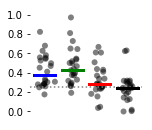

In [9]:
reload(magno)
magno.dotplot(fda,mc='bgrk',pc='k')
fig = plt.gcf()
fig.set_size_inches(2,2)
#plt.savefig('20180818_fda.pdf')
friedman(fda)

0.0393058609634
0.2652	0.2301	0.2301	
0.0223	0.0093	
0.2301	

0.008333333333333333


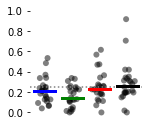

In [10]:
#reload(magno)
magno.dotplot(ada,mc='bgrk',pc='k')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.savefig('20180906_ada.pdf')
friedman(ada)

0.246738096778
0.7089	0.1354	0.6813	
0.093	0.9405	
0.218	

0.008333333333333333


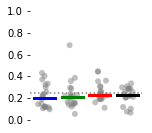

In [11]:
reload(magno)
magno.dotplot(fla,mc='bgrk',pc='0.5')
fig = plt.gcf()
fig.set_size_inches(2,2)
#plt.savefig('20180818_fla.pdf')
friedman(fla)

0.148527808599
0.6813	0.1084	0.6813	
0.0522	0.8228	
0.0731	

0.008333333333333333


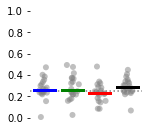

In [28]:
reload(magno)
magno.dotplot(ala,mc='bgrk',pc='0.5')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.savefig('20180906_ala.pdf')
friedman(ala)

0.0464268588265
0.3703	0.8228	0.0276	
0.7652	0.1454	
0.04	

0.008333333333333333


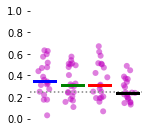

In [12]:
reload(magno)
magno.dotplot(fdc,mc='bgrk',pc='m')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.savefig('20180818_fdc.pdf')
friedman(fdc)

0.0925224371383
0.019	0.3052	0.9032	
0.019	0.0325	
0.4979	

0.008333333333333333


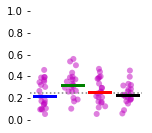

In [13]:
reload(magno)
magno.dotplot(flc,mc='bgrk',pc='m')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.savefig('20180818_flc.pdf')
friedman(flc)

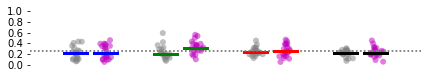

In [16]:
reload(magno)
f,ax = plt.subplots(1)
f.set_size_inches(7,1)
ax = magno.dotplot(fla,width=0.75,mc='bgrk',pos=range(0,12,3),pc='0.5')
ax = magno.dotplot(flc,width=0.75,mc='bgrk',pos=range(1,12,3),pc='m')
ax.set_xlim(-1.5,11.5)
plt.savefig('20160921_box_la-lc.pdf')

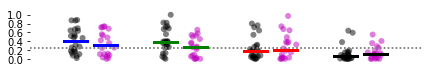

In [11]:
reload(magno)
f,ax = plt.subplots(1)
f.set_size_inches(7,1)
ax = magno.dotplot(fda,mc='bgrk',pos=range(0,12,3),pc='k')
ax = magno.dotplot(fdc,mc='bgrk',pos=range(1,12,3),pc='m')
ax.set_xlim(-1.5,11.5)
plt.savefig('20160921_box_da-dc.pdf')

In [68]:
allbar = [magno.shape_parse(la[i],'bar','all',prev=5) for i in range(len(la))]
allbar = [item for sublist in allbar for item in sublist]
t = [a.t for a in allbar]
t = [item for sublist in t for item in sublist]
offset = [np.radians(a.offset+15/2) for a in allbar]
offset = np.array([item for sublist in offset for item in sublist])
offset[offset > np.pi] -= 2*np.pi
offset[offset < -np.pi] += 2*np.pi

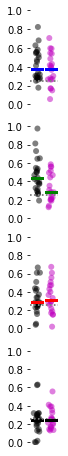

In [14]:
reload(magno)
n = len(fda)
f,ax = plt.subplots(n,1)
f.set_size_inches(0.5,8)
mc = 'bgrk'
for i in range(n):
    ax[i] = magno.dotplot([fda[i]],mc=mc[i],pc=['k'],pos=[0],ax=ax[i])
    ax[i] = magno.dotplot([fdc[i]],mc=mc[i],pc=['m'],pos=[1],ax=ax[i])
    ax[i].set_xlim(-0.5,1.5)
#plt.tight_layout()
plt.savefig('20181003_fdc.pdf')

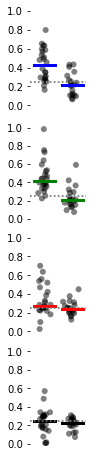

In [10]:
reload(magno)
n = len(fla)
f,ax = plt.subplots(n,1)
f.set_size_inches(1,8)
mc = 'bgrk'
for i in range(n):
    ax[i] = magno.dotplot([fda[i]],mc=mc[i],pc=['k'],pos=[0],ax=ax[i])
    ax[i] = magno.dotplot([fla[i]],mc=mc[i],pc=['k'],pos=[1],ax=ax[i])
    ax[i].set_xlim(-0.5,1.5)
#plt.tight_layout()
plt.savefig('20181024_dala.pdf')

In [ ]:
reload(magno)
n = len(fla)
f,ax = plt.subplots(n,1)
f.set_size_inches(0.5,8)
mc = 'bgrk'
for i in range(n):
    ax[i] = magno.dotplot([fla[i]],mc=mc[i],pc=['0.5'],pos=[0],ax=ax[i])
    ax[i] = magno.dotplot([flc[i]],mc=mc[i],pc=['m'],pos=[1],ax=ax[i])
    ax[i].set_xlim(-0.5,1.5)
#plt.tight_layout()
plt.savefig('20181003_flc.pdf')

# making 2d histograms of offset

C:\Users\liber\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


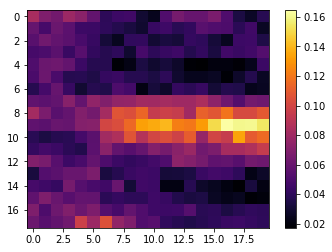

In [83]:
img = np.empty([len(da),20,18])
for k in range(len(da)):
    bars = magno.shape_parse(da[k],'bar','all',prev=5)
    t = [a.t for a in bars]
    offset = [np.radians(a.offset+15/2) for a in bars]
    allimg = np.empty([len(offset),20,18])
    for i in range(len(t)):
        offset[i][offset[i] > np.pi] -= 2*np.pi
        offset[i][offset[i] < -np.pi] += 2*np.pi
        a,_,_ = np.histogram2d(t[i],offset[i],bins=[20,18],range=[[-5,15],[-np.pi,np.pi]])
        for j in range(len(a)):
            a[j] = a[j] / sum(a[j])
        allimg[i,:,:] = a
    img[k,:,:] = np.nanmean(allimg,axis=0)
imgtoplot = np.rot90(np.nanmean(img,axis=0))
plt.imshow(imgtoplot,cmap='inferno')
plt.colorbar()

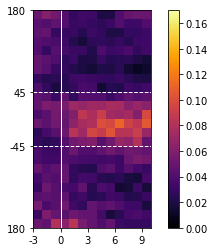

In [6]:
reload(magno)
h = np.empty([2,2],dtype='O')
imgtoplot,h[0][0] = magno.hist2d_time(da,shape='bar',freq='all')
norm = colors.Normalize(vmin=0, vmax=0.17)
h[0][0].set_norm(norm)
plt.colorbar(h[0][0])

d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:893: RuntimeWarning: invalid value encountered in true_divide
  a[j] = a[j] / sum(a[j])
d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.data['orientation'][data['orientation'] > 360] -= 360
d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.data['orientation'][data['orientation'] < 0] += 360


0.17575088847778922

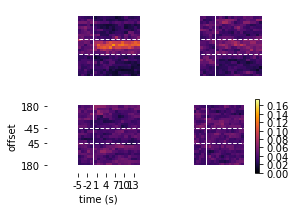

In [4]:
reload(magno)
magno.hist2d_listgrid([da,la],shape=['mbar','spot'],prev=5,tend=15,save=True,fname='20181031_mbarspot.pdf',vmax=0.17575088847778922)

In [51]:
reload(magno)

blank = [ magno.shape_parse(m,shape='blank',freq=1.0,prev=3) for m in da ]
bar = [ magno.shape_parse(m,shape='bar',freq=1.0,prev=3) for m in da ]
#blank = [ item for sublist in blank for item in sublist]

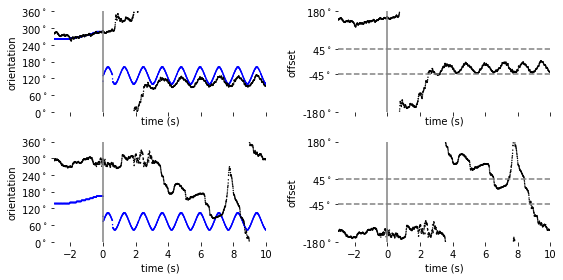

In [102]:
reload(magno)
j = 4
f,ax = plt.subplots(2,2,sharex=True,sharey='col')
f.set_size_inches(8,4)
magno.plot_trial(bar[j][0],ax=ax[0][0])
magno.plot_trial(blank[1][0],ax=ax[1][0])
magno.plot_offset(bar[j][0],ax=ax[0][1])
magno.plot_offset(blank[1][0],ax=ax[1][1])
ax[0][0].set_xlim([-3,10])
plt.tight_layout()
plt.savefig('illustration.pdf')

In [87]:
sum((blank[1][0].t >= 3) & (blank[1][0].t < 10) & (blank[1][0].offset < 45) & (blank[1][0].offset > -45)) / sum((blank[1][0].t >= 3) & (blank[1][0].t < 10))

0.18911174785100288

In [90]:
sum((bar[4][0].t >= 3) & (bar[4][0].t < 10) & (bar[4][0].offset < 45) & (bar[4][0].offset > -45)) / sum((bar[4][0].t >= 3) & (bar[4][0].t < 10))

0.97112462006079026

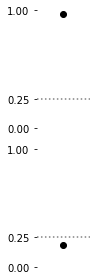

In [97]:
f,ax = plt.subplots(2,1,sharex=True,sharey=True)
f.set_size_inches(1.5,4)
ax[0].axhline(0.25,c='0.5',ls=':')
ax[1].axhline(0.25,c='0.5',ls=':')
ax[0].scatter([1],[0.97112462006079026],c='k')
ax[1].scatter([1],[0.18911174785100288],c='k')
ax[0].set_ylim([0,1])
ax[0].set_yticks([0,0.25,1])
ax[0].set_xticks([])
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('illustration-1.pdf')

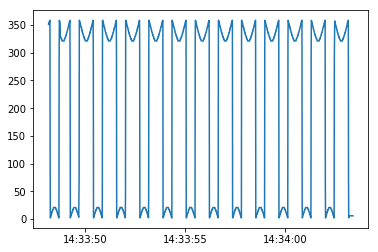

In [60]:
plt.plot(allbar[0].data['xstim'])

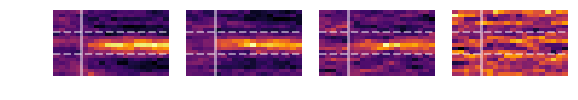

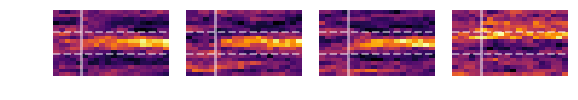

d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.data['orientation'][data['orientation'] > 360] -= 360
d:\Dropbox\labwork\scripts\magno-analysis\mozmagno.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.data['orientation'][data['orientation'] < 0] += 360


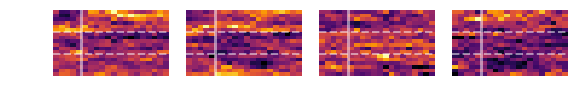

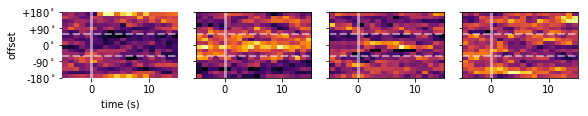

In [83]:
reload(magno)
ax = magno.hist2d_grid(da,shape=['bar','mbar','spot','blank'],
                 freq=['all'])#,save=True,fname='20160805_48bf.pdf')
for a in ax:
    a.set_axis_off()
plt.savefig('20160811_da.pdf')
plt.show()
ax = magno.hist2d_grid(dc,shape=['bar','mbar','spot','blank'],
                 freq=['all'])#,save=True,fname='20160805_48bf.pdf')
for a in ax:
    a.set_axis_off()
plt.savefig('20160811_dc.pdf')
plt.show()
ax = magno.hist2d_grid(la,shape=['bar','mbar','spot','blank'],
                 freq=['all'])#,save=True,fname='20160805_48bf.pdf')
for a in ax:
    a.set_axis_off()
plt.savefig('20160811_la.pdf')
plt.show()
ax = magno.hist2d_grid(lc,shape=['bar','mbar','spot','blank'],
                 freq=['all'])#,save=True,fname='20160805_48bf.pdf')
ticks = [-np.pi,-np.pi/2.,0,np.pi/2.,np.pi]
ticklabels = ['-180$^\circ$','-90$^\circ$','0$^\circ$','+90$^\circ$','+180$^\circ$']
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(ticklabels)
ax[0].set_ylabel('offset')
ax[0].set_xlabel('time (s)')
plt.savefig('20160811_lc.pdf')
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

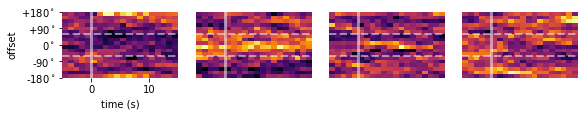

In [84]:
reload(magno)
ax = magno.hist2d_grid(lc,shape=['bar','mbar','spot','blank'],
                 freq=['all'])#,save=True,fname='20160805_48bf.pdf')
ticks = [-np.pi,-np.pi/2.,0,np.pi/2.,np.pi]
ticklabels = ['-180$^\circ$','-90$^\circ$','0$^\circ$','+90$^\circ$','+180$^\circ$']
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_yticks(ticks)
ax[0].set_yticklabels(ticklabels)
ax[0].set_ylabel('offset')
ax[0].set_xlabel('time (s)')
for i in range(1,len(ax)):
    ax[i].set_axis_off()

plt.colorbar()
plt.savefig('20160811_lc_colorbar.pdf')
plt.show()

In [4]:
# trying to plot fixation vs. origin point
m = da[0]
interval = 30
fixrange = 60
taft = 3
tend = 15

def fix_v_o(m,shape='all',freq='all',interval=30,fixrange=60,taft=3,tend=15):
    st = magno.shape_parse(m,shape=shape,freq=freq,prev=0)
    origin = np.array([ np.nanmean(s.offset[:10]) for s in st ])
    obin = np.arange(-180,180,interval)
    fix_by_o = np.empty(len(obin))
    fix_by_o[:] = np.nan
    for i in range(len(obin)):
        ind = np.where((origin >= obin[i]) & (origin <= obin[i]+interval))[0]
        if len(ind) > 0:
            fix_by_o[i] = np.nanmean([ sum((st[j].offset > -1*fixrange) & (st[j].offset < fixrange) & (st[j].t > taft) & (st[j].t <= tend))/
               float(sum((st[j].t > taft) & (st[j].t <= tend))) for j in ind ])
    return fix_by_o

In [5]:
def fix_v_o_all(moz,shape='all',freq='all',interval=30,fixrange=60,taft=3,tend=15):
    fix_by_o = np.empty([len(moz),len(np.arange(-180,180,interval))])
    fix_by_o[:] = np.nan
    for i in range(len(moz)):
        fix_by_o[i] = fix_v_o(moz[i],shape,freq,interval,fixrange,taft,tend)
    return np.transpose(fix_by_o)

In [75]:
fix_by_o = fix_v_o_all(da,shape='bar')

7.81538222404e-07
0.0002	0.0001	0.0	0.0001	0.0	0.0002	0.0	0.0	0.0001	0.0002	0.0001	
0.0003	0.0	0.0	0.0	0.0001	0.0	0.0001	0.0001	0.0	0.0003	
0.0	0.0003	0.0	0.0002	0.0	0.0001	0.0001	0.0001	0.0	
0.0	0.0	0.0001	0.0	0.0	0.0	0.0	0.0	
0.0	0.0	0.0	0.0	0.0001	0.0	0.0001	
0.0	0.0	0.0	0.0	0.0	0.0	
0.0	0.0001	0.0001	0.0	0.0	
0.0	0.0	0.0	0.0	
0.0	0.0	0.0	
0.0	0.0	
0.0001	

0.000757575757576


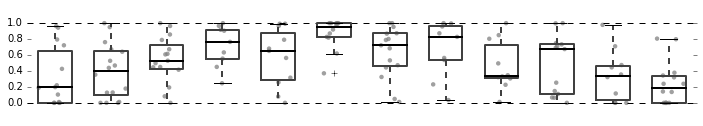

In [76]:
magno.boxplot(fix_by_o,col=['k']*len(da))
friedman(fix_by_o)

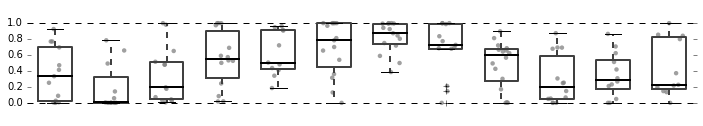

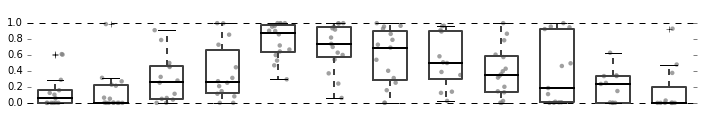

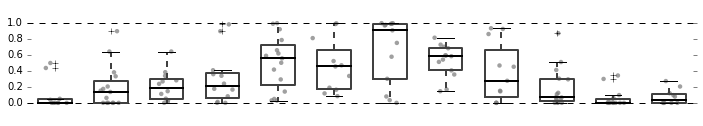

In [77]:
for s in ['mbar','spot','blank']:
    magno.boxplot(fix_v_o_all(da,shape=s),col=['k']*len(da))
    plt.show()

In [79]:
obin += 15

In [85]:
len(obin)

12

In [89]:
[ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]

[0.095647067015515702,
 0.08327923622732171,
 0.074163024556116786,
 0.082083668582437333,
 0.10405278508595942,
 0.053577037689653828,
 0.08005046331169792,
 0.11046036796352117,
 0.094304954046665473,
 0.099721719986775453,
 0.098419940519548027,
 0.070575116624505635]

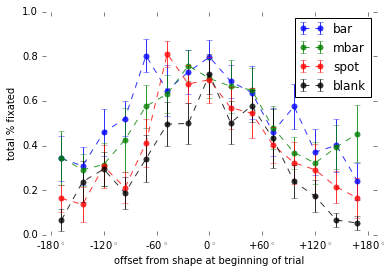

In [97]:
s = ['bar','mbar','spot','blank']
c = 'bgrk'
f,ax = plt.subplots(1)
obin = np.arange(-180,180,24) + 12
for i in range(4):
    fix_by_o = fix_v_o_all(da,shape=s[i],interval=24)
    yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
    ax.errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c=c[i],label=s[i])
plt.legend()
ticks = [-180,-120,-60,0,60,120,180]
ticklabels = ['-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$']
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_ylim(0,1.0)
ax.set_xlim(-190,190)
ax.set_xlabel('offset from shape at beginning of trial')
ax.set_ylabel('total % fixated')
plt.savefig('20160811_posdependence.pdf')

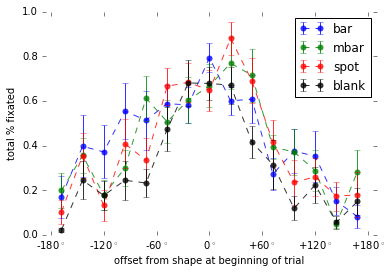

In [98]:
s = ['bar','mbar','spot','blank']
c = 'bgrk'
f,ax = plt.subplots(1)
obin = np.arange(-180,180,24) + 12
for i in range(4):
    fix_by_o = fix_v_o_all(dc,shape=s[i],interval=24)
    yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
    ax.errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c=c[i],label=s[i])
plt.legend()
ticks = [-180,-120,-60,0,60,120,180]
ticklabels = ['-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$']
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_ylim(0,1.0)
ax.set_xlim(-190,190)
ax.set_xlabel('offset from shape at beginning of trial')
ax.set_ylabel('total % fixated')
#plt.savefig('20160811_posdependence.pdf')

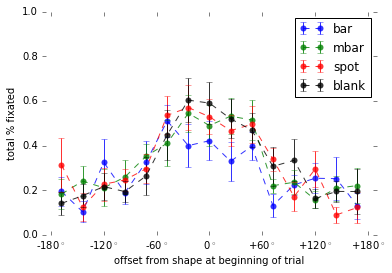

In [9]:
s = ['bar','mbar','spot','blank']
c = 'bgrk'
f,ax = plt.subplots(1)
obin = np.arange(-180,180,24) + 12
for i in range(4):
    fix_by_o = fix_v_o_all(la,shape=s[i],interval=24)
    yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
    ax.errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c=c[i],label=s[i])
plt.legend()
ticks = [-180,-120,-60,0,60,120,180]
ticklabels = ['-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$']
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_ylim(0,1.0)
ax.set_xlim(-190,190)
ax.set_xlabel('offset from shape at beginning of trial')
ax.set_ylabel('total % fixated')
plt.savefig('20160822_posdependence_la.pdf')

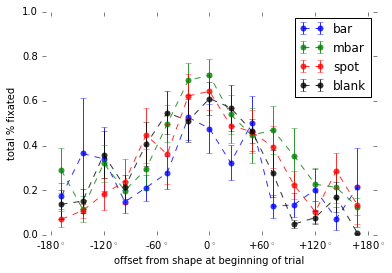

In [8]:
s = ['bar','mbar','spot','blank']
c = 'bgrk'
f,ax = plt.subplots(1)
obin = np.arange(-180,180,24) + 12
for i in range(4):
    fix_by_o = fix_v_o_all(lc,shape=s[i],interval=24)
    yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
    ax.errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c=c[i],label=s[i])
plt.legend()
ticks = [-180,-120,-60,0,60,120,180]
ticklabels = ['-180$^\circ$','-120$^\circ$','-60$^\circ$','0$^\circ$','+60$^\circ$','+120$^\circ$','+180$^\circ$']
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_ylim(0,1.0)
ax.set_xlim(-190,190)
ax.set_xlabel('offset from shape at beginning of trial')
ax.set_ylabel('total % fixated')
plt.savefig('20160822_posdependence_lc.pdf')

(-190, 190)

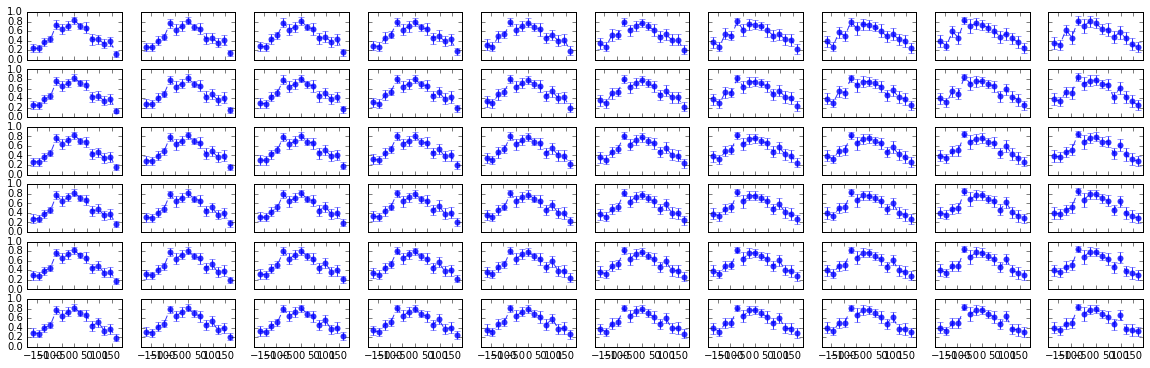

In [11]:
start = range(10)
stop = range(10,16)
f,ax = plt.subplots(len(stop),len(start),sharex=True,sharey=True)
f.set_size_inches(2*len(start),1*len(stop))
obin = np.arange(-180,180,24) + 12
for i in range(len(start)):
    for j in range(len(stop)):
        fix_by_o = fix_v_o_all(da,shape='bar',interval=24,taft=start[i],tend=stop[j])
        yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
        ax[j,i].errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c='b')
ax[0,0].set_ylim(0,1.0)
ax[0,0].set_xlim(-190,190)

(-190, 190)

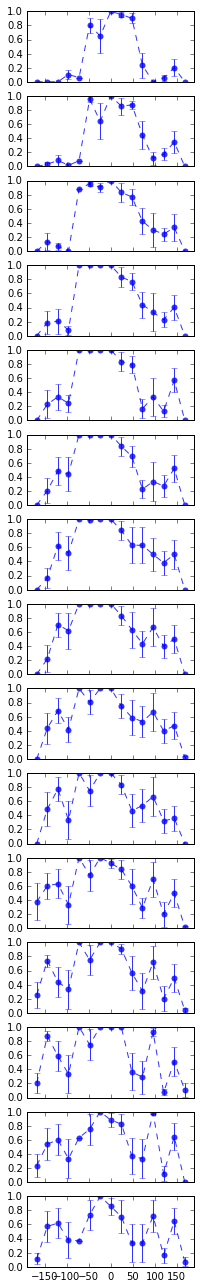

In [13]:
start = range(15)
f,ax = plt.subplots(len(start),1,sharex=True,sharey=True)
f.set_size_inches(3,1.5*len(start))
obin = np.arange(-180,180,24) + 12
for i in range(len(start)):
    fix_by_o = fix_v_o_all(da,shape='bar',freq=0.0,interval=24,taft=start[i],tend=start[i]+1)
    yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
    ax[i].errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c='b')
ax[0].set_ylim(0,1.0)
ax[0].set_xlim(-190,190)

(-190, 190)

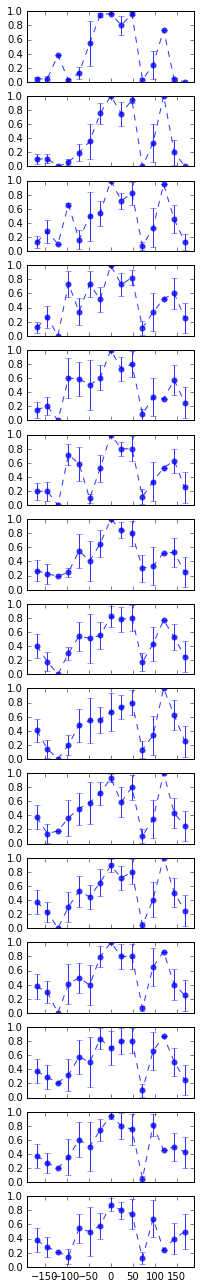

In [14]:
start = range(15)
f,ax = plt.subplots(len(start),1,sharex=True,sharey=True)
f.set_size_inches(3,1.5*len(start))
obin = np.arange(-180,180,24) + 12
for i in range(len(start)):
    fix_by_o = fix_v_o_all(da,shape='bar',freq=1.0,interval=24,taft=start[i],tend=start[i]+1)
    yerr = [ np.std(f[~np.isnan(f)])/len(f[~np.isnan(f)])**0.5 for f in fix_by_o ]
    ax[i].errorbar(obin,np.nanmean(fix_by_o,axis=1),yerr=yerr,fmt='--o',alpha=0.8,mec='None',c='b')
ax[0].set_ylim(0,1.0)
ax[0].set_xlim(-190,190)

In [5]:
bg = magno.shape_parse(da[-10],shape='bg')

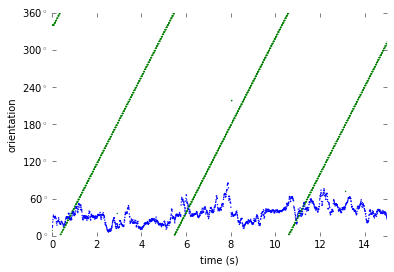

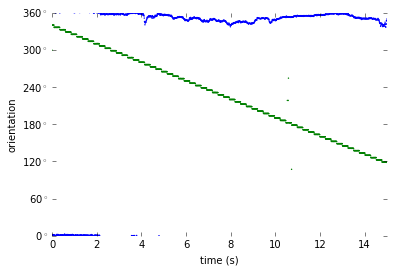

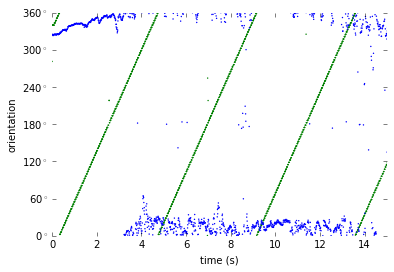

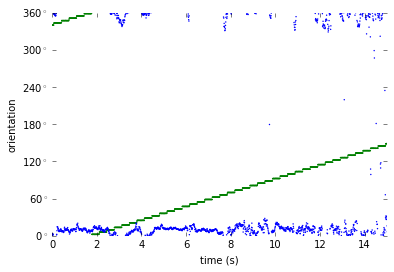

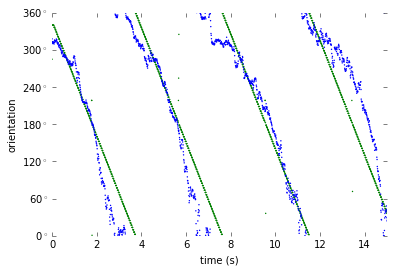

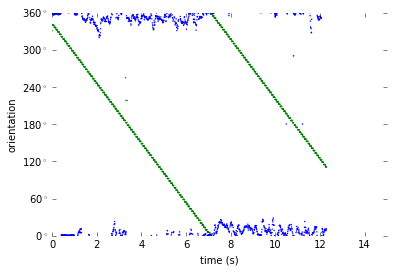

In [6]:
for b in bg:
    magno.plot_trial(b)
    plt.show()

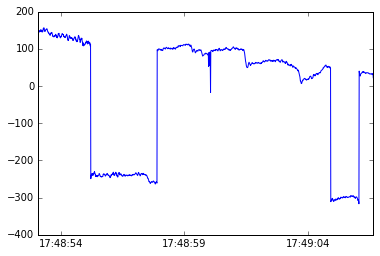

In [22]:
plt.plot(bg[0].data['orientation'] - bg[0].data['xstim'])

In [59]:
def testbg(trial):
    xstim = magno.cts_trace(trial.data['xstim'])
    ori = magno.cts_trace(trial.data['orientation'])
    follow = ori - xstim
    B, A = signal.butter(8,0.1,output='ba')
    filtfol = signal.filtfilt(B,A,abs(np.diff(follow)))
    f,ax = plt.subplots(2,sharex=True)
    ax[0].plot(follow)
    ax[1].plot(filtfol)
    ax[1].set_ylim(0,5)
    return follow,filtfol

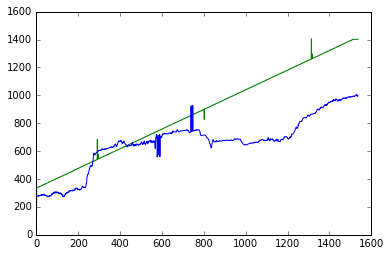

In [37]:
xstim = magno.cts_trace(bg[0].data['xstim'])
ori = magno.cts_trace(bg[0].data['orientation'])
plt.plot(xstim,c='g')
plt.plot(ori,c='b')

In [38]:
t = bg[0].t
(xstim[-1]-xstim[0])/t[-1]

90.572088985324157

In [24]:
avg = [ (xstim[i]-xstim[0])/t[i] for i in range(len(t)) ]

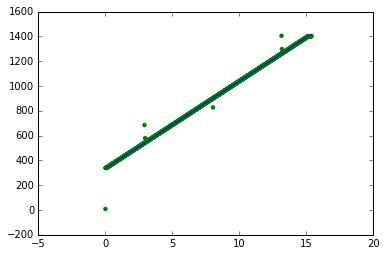

In [39]:
a,b,_,_,_ = stats.linregress(t,xstim)
plt.scatter(t,xstim,c='g',edgecolor='none')
plt.plot(t,(a*t)+b,c='b')

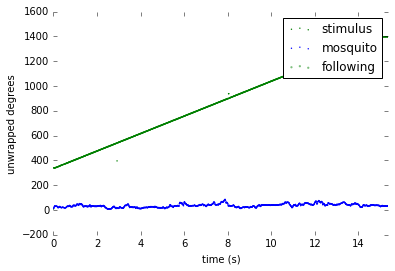

0.0


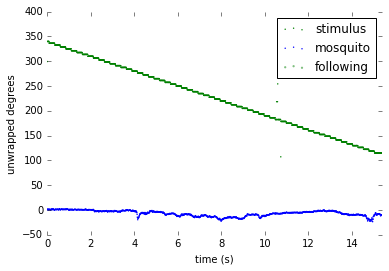

0.0


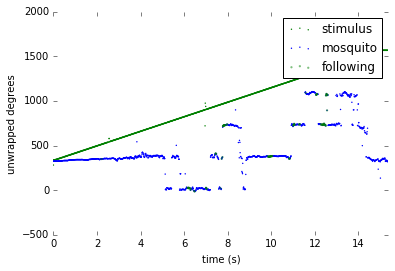

0.0657142857143


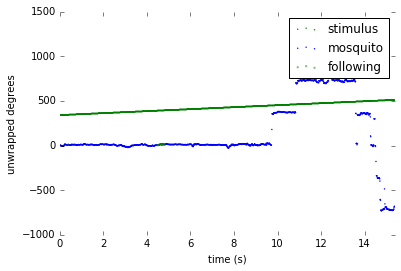

0.0110966057441


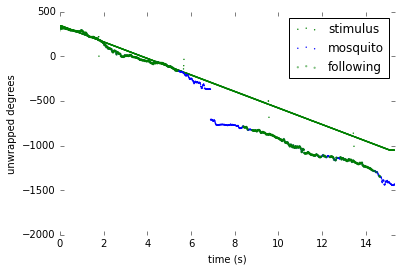

0.696020874103


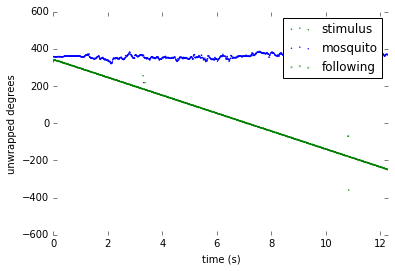

0.0


In [24]:
reload(magno)
for b in bg:
    f,a = magno.following(b,300,0.3,plot=True)
    plt.show()
    print f

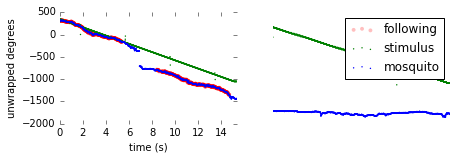

In [34]:
f,ax = plt.subplots(1,2,sharex=True)
f.set_size_inches(7,2)
plt.sca(ax[0])
_,_ = magno.following(bg[4],300,0.33,plot=True)
ax[0].legend_ = None
plt.sca(ax[1])
_,_ = magno.following(bg[1],300,0.33,plot=True)
ax[1].set_axis_off()
plt.savefig('20160902_following.pdf')

In [69]:
f = (avgo > 0.5*a) & (avgo < 1.5*a)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1488 but corresponding boolean dimension is 1438
  app.launch_new_instance()


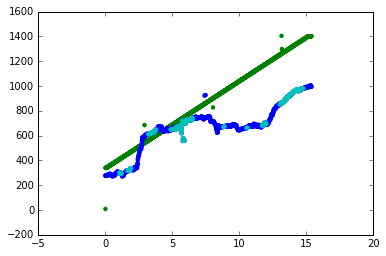

In [70]:
plt.scatter(t,xstim,c='g',edgecolor='none')
plt.scatter(t,ori,c='b',edgecolor='none')
plt.scatter(t[50:][f],ori[50:][f],c='c',edgecolor='none')

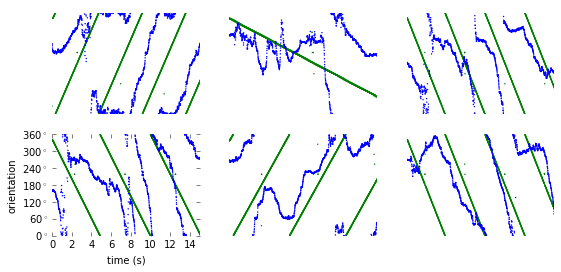

In [231]:
f,ax = plt.subplots(2,3,sharex=True,sharey=True)
f.set_size_inches(9,4)
for i in range(len(bg)-2):
    magno.plot_trial(bg[i+2],ax=ax[i%2,i%3])
    if i != 3:
        ax[i%2,i%3].set_axis_off()
ax[0,0].set_xlim(0,15)
plt.savefig('20160921_raw_following-before.pdf')

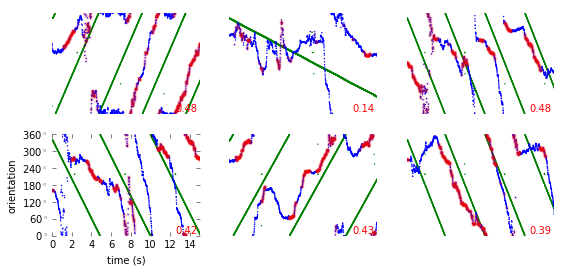

In [232]:
reload(magno)
bg = magno.shape_parse(da[11],shape='bg')
v = np.empty(len(bg)-2)
fol = np.empty(len(bg)-2)
v[:] = np.nan
fol[:] = np.nan
f,ax = plt.subplots(2,3,sharex=True,sharey=True)
f.set_size_inches(9,4)
for i in range(len(bg)-2):
    fol[i],v[i] = magno.following(bg[i+2],150,0.5,plot=True,ax=ax[i%2,i%3],textx=12.5)
    if i != 3:
        ax[i%2,i%3].set_axis_off()
ax[0,0].set_xlim(0,15)
plt.savefig('20160921_raw_following-after.pdf')

In [217]:
[ a for a in axis for axis in ax ][0]

0.0296735905045


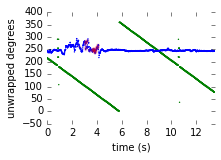

0.164068299926


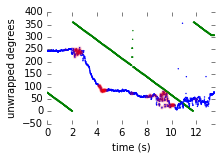

In [150]:
bg = magno.shape_parse(da[9],shape='bg')
v = np.empty(len(bg))
fol = np.empty(len(bg))
v[:] = np.nan
fol[:] = np.nan
for i in range(len(bg)):
    plt.figure(i,[3,2])
    fol[i],v[i] = magno.following(bg[i],150,0.5,plot=True)
    print fol[i]
    plt.show()

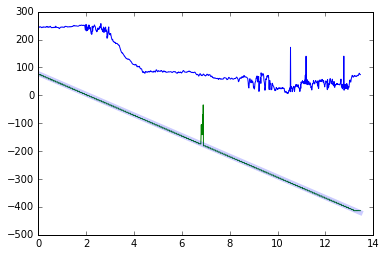

In [126]:
trial = bg[1]
xstim = magno.cts_trace(trial.data['xstim'])
ori = magno.cts_trace(trial.data['orientation'])
t = trial.t
a,_,_,_,_ = stats.linregress(t,xstim) # slope of xstim
plt.plot(t,xstim,c='g')
plt.plot(t,a*t+xstim[0],alpha=0.2,c='b',lw=5)
plt.plot(t,ori)

In [112]:
trace = deepcopy(trial.data['orientation'])
jumps = np.diff(trace)
d_jumps = np.where(abs(jumps) > 200)[0].tolist()
d_jumps = [x for x in d_jumps if x!=0]
segs = np.split(trace,d_jumps)
print d_jumps

[763, 764, 1029, 1030, 1041, 1042, 1070, 1071, 1115, 1117, 1124, 1128, 1138, 1143, 1151, 1154, 1165, 1166, 1168, 1172, 1181, 1182, 1183, 1185, 1189, 1190]


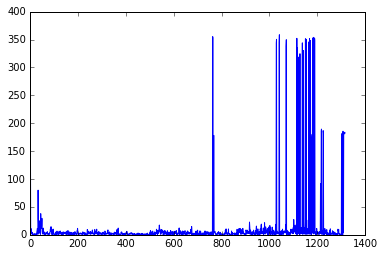

In [113]:
plt.plot(abs(jumps))

In [46]:
allfol = np.empty([len(da),10])
allv = np.empty([len(da),10])
allfol[:] = np.nan
allv[:] = np.nan
for i in range(len(da)):
    bg = magno.shape_parse(da[i],shape='bg')
    v = np.empty(len(bg))
    fol = np.empty(len(bg))
    v[:] = np.nan
    fol[:] = np.nan
    for j in range(len(bg)):
        fol[j],v[j] = magno.following(bg[j],300,0.3)
    allfol[i,:len(fol)] = fol
    allv[i,:len(v)] = v

In [49]:
dcfol = np.empty([len(dc),10])
dcv = np.empty([len(dc),10])
dcfol[:] = np.nan
dcv[:] = np.nan
for i in range(len(dc)):
    bg = magno.shape_parse(dc[i],shape='bg')
    v = np.empty(len(bg))
    fol = np.empty(len(bg))
    v[:] = np.nan
    fol[:] = np.nan
    for j in range(len(bg)):
        fol[j],v[j] = magno.following(bg[j],300,0.3)
    dcfol[i,:len(fol)] = fol
    dcv[i,:len(v)] = v

In [237]:
y1

array([ 0.1782974 ,  0.20005684,  0.14989376,  0.51140065,  0.26879272,
        0.        ,  0.28251514,  0.36757237,  0.24951267,  0.09687095,
        0.29168657,  0.37654875,  0.46505608,  0.27142169,  0.14902961,
        0.26350754,  0.50631215,  0.41158962,  0.22649748,  0.78790172,
        0.27489591,  0.16796875,  0.29396771])

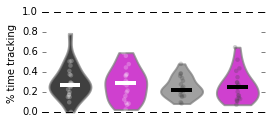

In [262]:
f,ax = plt.subplots(1)
f.set_size_inches(4,2)
ax = magno.violinplot(np.array([np.transpose(y1)]),fc='k',mc='w',pos=[0],pc='w',ax=ax,fixline=False)
ax = magno.violinplot(np.array([np.transpose(y2)]),fc='m',mc='w',pos=[1],pc='w',ax=ax,fixline=False)
ax = magno.violinplot(np.array([np.transpose(y3)]),fc=['0.5'],mc='k',pos=[2],pc='0.25',ax=ax,fixline=False)
ax = magno.violinplot(np.array([np.transpose(y4)]),fc='m',mc='k',pos=[3],pc='0.25',ax=ax,fixline=False)
ax.set_xlim(-0.5,3.5)
ax.set_ylabel('% time tracking')
plt.savefig('20160921_opto_dadclalc.pdf')

In [248]:
y1.shape[1]

IndexError: tuple index out of range

In [ ]:
reload(magno)
dafol,dav = magno.allfol(da,vint=150,thres=0.5)
y1 = np.nanmean(dafol,axis=1)
y1 = y1[~np.isnan(y1)]
x = np.random.normal(1,0.1,len(y1))
plt.scatter(x,y1,c='0.5',alpha=0.75,edgecolor='None')
a = plt.violinplot(y1,positions=[1],widths=0.6,showextrema=True, showmedians=True)

dcfol,dcv = magno.allfol(dc,vint=150,thres=0.5)
y2 = np.nanmean(dcfol,axis=1)
y2 = y2[~np.isnan(y2)]
x = np.random.normal(2,0.1,len(y2))
plt.scatter(x,y2,c='0.5',alpha=0.75,edgecolor='None')
a = plt.violinplot(y2,positions=[2],widths=0.6,showextrema=True, showmedians=True)

lafol,lav = magno.allfol(la,vint=150,thres=0.5)
y3 = np.nanmean(lafol,axis=1)
y3 = y3[~np.isnan(y3)]
x = np.random.normal(3,0.1,len(y3))
plt.scatter(x,y3,c='0.5',alpha=0.75,edgecolor='None')
a = plt.violinplot(y3,positions=[3],widths=0.6,showextrema=True, showmedians=True)

(0, 1)

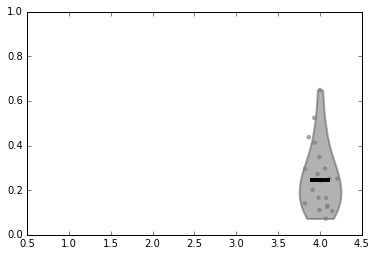

In [178]:
#lcfol,lcv = magno.allfol(lc,vint=150,thres=0.5)
#y4 = np.nanmean(lcfol,axis=1)
#y4 = y4[~np.isnan(y4)]
x = np.random.normal(4,0.1,len(y4))

a = plt.violinplot(y4,positions=[4],widths=0.5,showextrema=False,showmedians=True)
for pc in a['bodies']:
    pc.set(facecolor='k',edgecolor='k',linewidth=2)
    #pc.set_edgecolor('k')
    #pc.set_linewidth(2)
a['cmedians'].set(color='k',linewidth=4)

plt.scatter(x,y4,c='0.5',alpha=0.75,edgecolor='None')

plt.xlim(0.5,4.5)
plt.ylim(0,1)

In [170]:
a['cmeans'].set(linestyle='-o')

ValueError: Do not know how to convert -o to dashes

In [134]:
stats.mannwhitneyu(y1,y2,alternative='two-sided')

MannwhitneyuResult(statistic=217.5, pvalue=0.98991834614684926)

In [119]:
stats.mannwhitneyu(y1,y3,alternative='two-sided')

MannwhitneyuResult(statistic=280.0, pvalue=0.2280924241301413)

In [135]:
stats.mannwhitneyu(y3,y4,alternative='two-sided')

MannwhitneyuResult(statistic=179.0, pvalue=0.5792183523134169)

In [138]:
dafol

array([[ 0.2071494 ,  0.23142669,  0.08524904,  0.18936446,         nan,
                nan,         nan,         nan,         nan,         nan],
       [ 0.25339367,  0.09694209,  0.24983477,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [ 0.30557868,  0.04025974,  0.09862835,  0.17578125,  0.12922078,
                nan,         nan,         nan,         nan,         nan],
       [ 0.51140065,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [ 0.8210084 ,  0.08517555,  0.        ,  0.30916282,  0.23076923,
         0.38095238,  0.05448065,         nan,         nan,         nan],
       [ 0.        ,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [ 0.23493235,  0.4432505 ,  0.129473  ,  0.34116112,  0.47396529,
         0.08783344,  0.26699029,         nan

In [142]:
np.nanmean(dafol,axis=1)

array([ 0.21092449,  0.26631911,  0.18524454,  0.5485342 ,  0.33373206,
        0.        ,  0.31000956,  0.4075107 ,  0.22677063,  0.13140312,
        0.31156454,  0.44385945,  0.51811907,  0.32867082,  0.16847789,
        0.36925538,  0.59016441,  0.44585402,  0.24038076,  0.9023601 ,
        0.34377511,  0.171875  ,  0.39337298,         nan])